In [16]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
scriptDir = os.getcwd() # Assumes that script is executed from its actual location
relPath = r"../data/" # And data is located in a 'data' folder in the same parent directory as 'code' folder
relPathOutput = r"../output/"
trainFilePath = os.path.join(scriptDir, relPath, "train.csv")
valFilePath = os.path.join(scriptDir, relPath, "validation.csv")
testFilePath = os.path.join(scriptDir, relPath, "test.csv")
outputFolderPath = os.path.join(scriptDir, relPathOutput)

In [66]:
# Load training data into pandas dataframe
df = pd.read_csv(trainFilePath, sep=',',header=0, quotechar='"')

In [67]:
# Descriptive statistics
# dfDesc = df.describe(include='all')
# dfUnqCnt = df.nunique().to_frame().transpose().rename({0: 'unique_cnt'}, axis='index')
# dfNaN = df.isna().sum().to_frame().transpose().rename({0: 'NaN'}, axis='index')
# frames = [dfDesc, dfUnqCnt, dfNaN]
# dfDesc = pd.concat(frames)

In [68]:
#dfDesc.transpose()[['count', 'unique_cnt', 'mean', 'std']] #show
# TODO add label for what kind of variable it is

In [88]:
# Total metrics
totalImpressions = df.shape[0]
totalClicks = df['click'].sum()
totalCost = df['payprice'].sum()
CTR = float(totalClicks) / totalImpressions # click-through-rate (CTR)
aCPM = df['payprice'].mean() # average cost-per-mille (aCPM)
eCPC = float(totalCost) / totalClicks # effective cost-per-click (eCPC)
print(totalImpressions, totalClicks, totalCost, CTR, aCPM, eCPC)

2430981 1793 189984608 0.0007375623256619447 78.15141623895867 105959.06748466258


In [89]:
metricsTrain = pd.DataFrame({'Impressions': totalImpressions,
                        'Clicks': totalClicks,
                        'Cost': totalCost,
                        'CTR': CTR,
                        'Average CPM': aCPM,
                        'eCPC': eCPC}, index=['Training data'])

In [80]:
# Same metrics for validation set
dfVal = pd.read_csv(valFilePath, sep=',',header=0, quotechar='"')

In [81]:
totalImpressions = dfVal.shape[0]
totalClicks = dfVal['click'].sum()
totalCost = dfVal['payprice'].sum()
CTR = float(totalClicks) / totalImpressions # click-through-rate (CTR)
aCPM = dfVal['payprice'].mean() # average cost-per-mille (aCPM)
eCPC = float(totalCost) / totalClicks # effective cost-per-click (eCPC)
print(totalImpressions, totalClicks, totalCost, CTR, aCPM, eCPC)

303925 202 23777270 0.0006646376573167722 78.23400509994242 117709.25742574257


In [82]:
metricsVal = pd.DataFrame({'Impressions': totalImpressions,
                        'Clicks': totalClicks,
                        'Cost': totalCost,
                        'CTR': CTR,
                        'Average CPM': aCPM,
                        'eCPC': eCPC}, index=['Validation data'])

In [90]:
metricsAll = pd.concat([metricsTrain, metricsVal])
metricsAll

,Impressions,Clicks,Cost,CTR,Average CPM,eCPC
Training data,2430981,1793,189984608,0.000738,78.151416,105959.067485
Validation data,303925,202,23777270,0.000665,78.234005,117709.257426


In [92]:
with open(os.path.join(outputFolderPath, 'metrics.tex'),'w') as t:
    t.write(metricsAll.to_latex())

# CTR by attribute

In [70]:
# Split 'useragent' field into 'OS' and 'browser'
dfn = df['useragent'].str.split('_', expand = True)
df['OS'] = dfn[0]
df['browser'] = dfn[1]
# Create slotsize field
df['slotsize'] = df['slotheight'] * df['slotwidth']

In [71]:
weekday = df.groupby('weekday')['click'].apply(np.mean).reset_index().rename({'click': 'CTR'}, axis='columns')
hour = df.groupby('hour')['click'].apply(np.mean).reset_index().rename({'click': 'CTR'}, axis='columns')
OS = df.groupby('OS')['click'].apply(np.mean).reset_index().rename({'click': 'CTR'}, axis='columns')
browser = df.groupby('browser')['click'].apply(np.mean).reset_index().rename({'click': 'CTR'}, axis='columns')
region = df.groupby('region')['click'].apply(np.mean).reset_index().rename({'click': 'CTR'}, axis='columns')
adexchange = df.groupby('adexchange')['click'].apply(np.mean).reset_index().rename({'click': 'CTR'}, axis='columns')
slotformat = df.groupby('slotformat')['click'].apply(np.mean).reset_index().rename({'click': 'CTR'}, axis='columns')
advertiser = df.groupby('advertiser')['click'].apply(np.mean).reset_index().rename({'click': 'CTR'}, axis='columns')

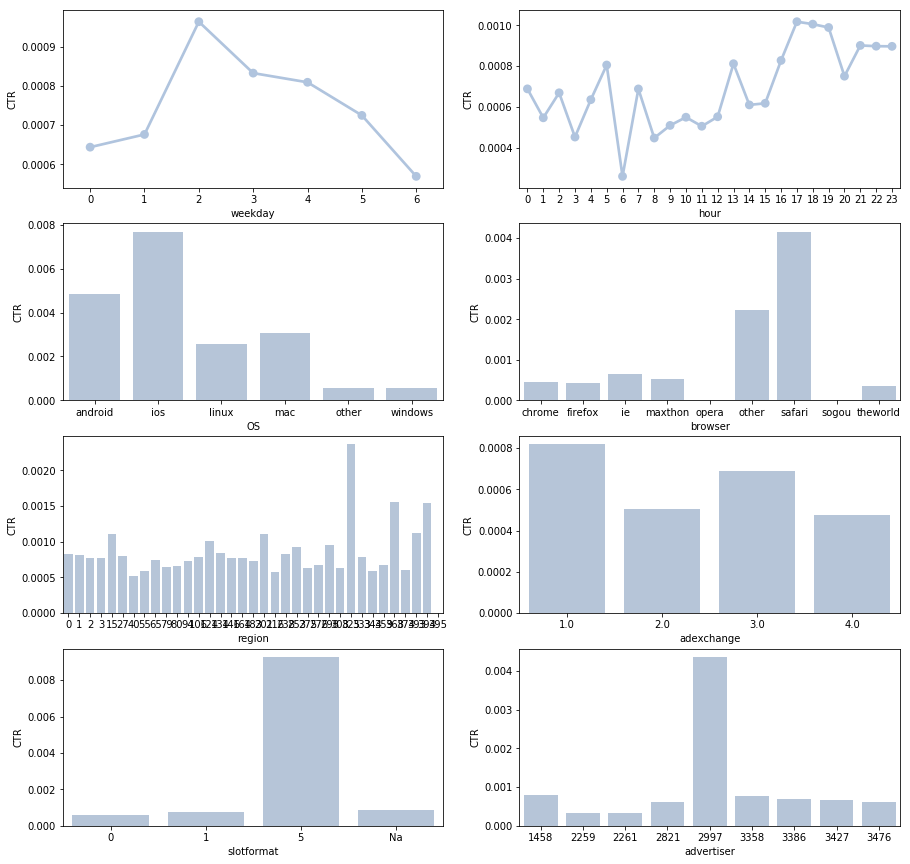

In [91]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15))
#fig.suptitle('CTR by selected attributes')
sns.pointplot(x='weekday', y='CTR', data=weekday, color='lightsteelblue', ax=axes[0, 0])
sns.pointplot(x='hour', y='CTR', data=hour, color='lightsteelblue', ax=axes[0, 1])
sns.barplot(x='OS', y='CTR', data=OS, color='lightsteelblue', ax=axes[1, 0])
sns.barplot(x='browser', y='CTR', data=browser, color='lightsteelblue', ax=axes[1, 1])
sns.barplot(x='region', y='CTR', data=region, color='lightsteelblue', ax=axes[2, 0])
sns.barplot(x='adexchange', y='CTR', data=adexchange, color='lightsteelblue', ax=axes[2, 1])
sns.barplot(x='slotformat', y='CTR', data=slotformat, color='lightsteelblue', ax=axes[3, 0])
sns.barplot(x='advertiser', y='CTR', data=advertiser, color='lightsteelblue', ax=axes[3, 1])

In [93]:
fig.savefig(os.path.join(outputFolderPath, 'CTR_multi.png'));